# 08_branching 
Create branched polymers [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VlachosGroup/LigninGraphs/blob/master/docs/source/examples/08_branching.ipynb)

Install the package from pip (skip this step if the package is already installed)


In [ ]:
! pip install ligning

In [1]:
# set ligning path (optional if installed via pip)
import sys, os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..\..'))
print(project_path)
sys.path.insert(0, project_path)

import ligning.characterization as ch
import ligning.monomer as mono
import ligning.polymer as poly
import ligning.utils as ut
from ligning.rules import linkage_ring
import time 
from rdkit import Chem

c:\Users\yifan\Documents\GitHub\LigninGraphs


RDKit WARNING: [18:15:16] Enabling RDKit 2019.09.3 jupyter extensions


Test on branched polymer

Connect a S to a G unit (in polymer) via a 4-O-5 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
The branching coefficient is 0.25


c:\Users\yifan\Documents\GitHub\LigninGraphs\ligning\polymer.py:544: UserWarning: No more bonding atoms available
  warnings.warn("No more bonding atoms available")


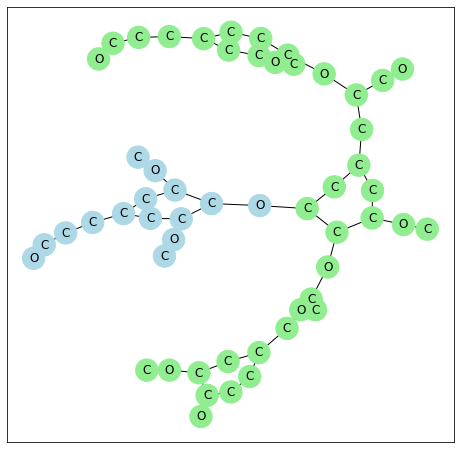

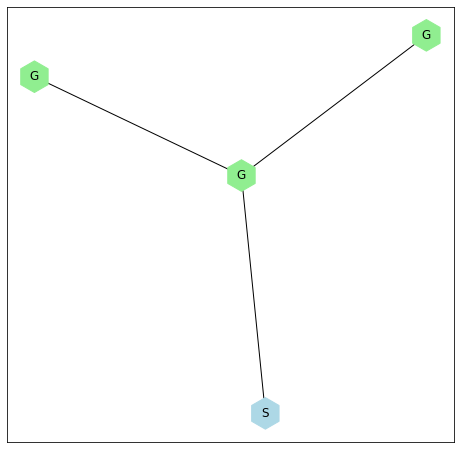

In [2]:
#%% Constructing a dimmer for testing
m0 = mono.Monomer("S")
polymer = poly.Polymer(m0)
polymer.add_specific_linkage(linkage_type = '4-O-5', monomer_type = 'G')
#%% Test on branched polymer
polymer_0 = poly.Polymer(polymer)
start = time.time()
n_iter = 10
for i in range(n_iter):
    flag = polymer_0.add_specific_linkage(linkage_type ='beta-O-4', monomer_type = 'G', branching_state=True)
    #polymer.add_specific_linkage(linkage_type ='5-5', monomer_type = 'G')

P_mol_0 = ut.graph_to_mol(polymer_0.G)
# Characterize the polymer
ch_p = ch.Characterize(polymer_0)
ch_p.cal_branching()
branching_coeff_0 = ch_p.branching_coeff
assert(branching_coeff_0 == 0.25)
print('The branching coefficient is {}'.format(branching_coeff_0))

#%% Test on drawing functions
ut.draw_atomic_graph(polymer_0.G)
ut.draw_big_graph(polymer_0.bigG)


Test on non-branched polymer

Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a S to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
The branching coefficient is 0.0


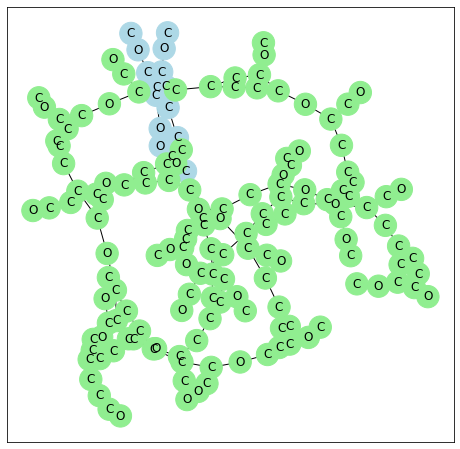

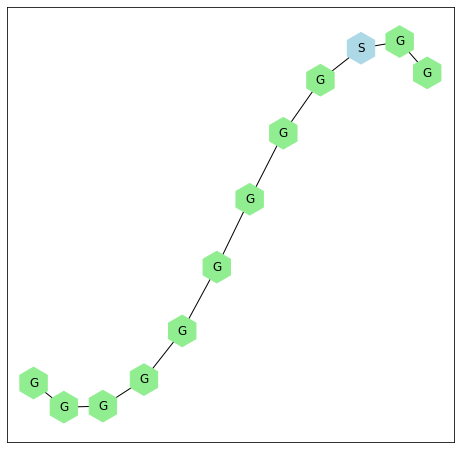

In [3]:
polymer_1 = poly.Polymer(polymer)
start = time.time()
n_iter = 10
for i in range(n_iter):
    polymer_1.add_specific_linkage(linkage_type ='beta-O-4', monomer_type = 'G', branching_state=False)
    #polymer.add_specific_linkage(linkage_type ='5-5', monomer_type = 'G')

P_mol_1 = ut.graph_to_mol(polymer_1.G)
# Characterize the polymer
ch_p = ch.Characterize(polymer_1)
ch_p.cal_branching()
branching_coeff_1 = ch_p.branching_coeff
assert(branching_coeff_1 == 0)
print('The branching coefficient is {}'.format(branching_coeff_1))

#%% Test on drawing functions
ut.draw_atomic_graph(polymer_1.G)
ut.draw_big_graph(polymer_1.bigG)